# <center>画图教学</center>

### 1. 科研绘图的准则
> a. 科研绘图不是艺术画图，每一条线、每一个点、颜色、大小、形状都有不同的意义\
> b. 科研画图颜色不能过于强烈，以暖色调为主，如果不是必要，不用使用很丰富的颜色\
> c. 可以使用统一颜色不同色调或不同透明度表示不同的意义\
> d. 很多纸质出版是黑白的，因此如果两个变量在黑白打印中颜色一样，那么要用其他方法区分\
> e. 不是为了画图而画图，而是为了呈现一个很有意思、很有价值的结果才去画图

# <center>Python画图包</center>

python画图最重要的包matplotlib，安装方式：在cmd中输入 pip3 install matplotlib

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

### <center> 字体修改 </center>

因为中文选择不对会乱码，下面以中文为例，但是学术论文一般用罗马roman字体，或者arial或者Helvetica

.Aqua Kana
.Keyboard
.New York
.New York
.SF Arabic
.SF Arabic Rounded
.SF Armenian
.SF Armenian Rounded
.SF Camera
.SF Compact
.SF Compact
.SF Compact Rounded
.SF Georgian
.SF Georgian Rounded
.SF Hebrew
.SF Hebrew Rounded
.SF NS Mono
.SF NS Mono
.SF NS Rounded
.SF Soft Numeric
.ThonburiUI
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Artifakt Element
Artifakt Element
Artifakt Element
Artifakt Element
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
Baghdad
Bangla MN
Bangla Sangam MN
Baskerville
Beirut
Big Caslon
Bodoni 72
Bodoni 72 Oldstyle
Bodoni 72 Smallcaps
Bodoni Ornaments
Bradley Hand
Brush Script MT
Chalkboard
Chalkboard SE
Chalkduster
Char

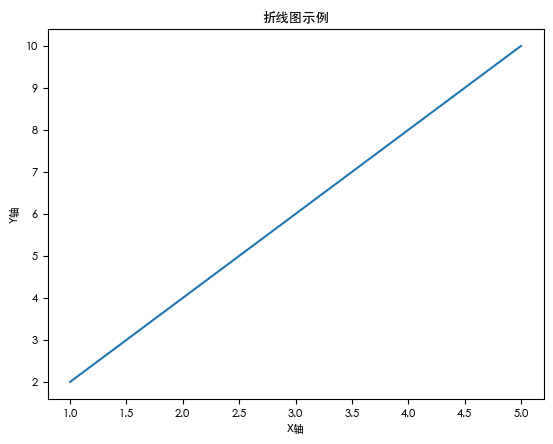

<Figure size 640x480 with 0 Axes>

In [121]:
# 每一个系统的中文都有所不同，windows macos linux和python对中文的支持都不是很好，需要用以下代码确定我们要用的字体到底在电脑里面叫什么
import matplotlib
font_set = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

for font in font_set:
    print(font) # 打印所有字体，需要什么在下面找

plt.rcParams['font.family'] = 'Heiti TC' # Mac里面的黑体叫Heiti TC，因此后面我想要使用黑体就会改成这个
# plt.rcParams['font.family'] = 'SimHei' # windows可能叫这个，自己查询到用这一行代码
%run simple_plot.py # 在jupyter里面运行同一个文件夹里面的py文件

### <center> 字号修改 </center>

字号修改也很重要，一般学术论文中图里的字号略小于正文字体，比如正文是小四（12pt），那么图片里面也可以是12pt或者11pt或者10pt，也不能太小了，一般python画图默认10pt


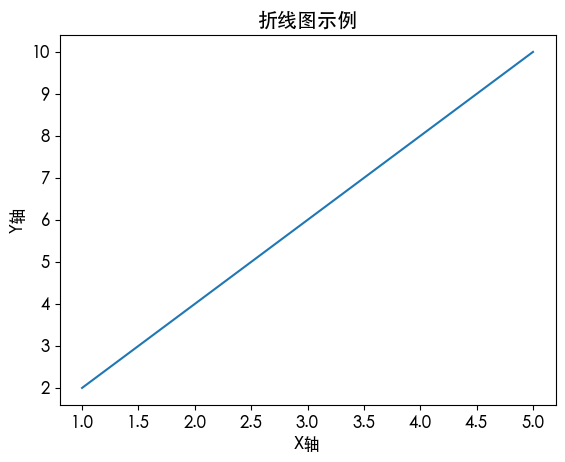

<Figure size 640x480 with 0 Axes>

In [122]:
plt.rcParams['font.size'] = 12  # 但是标题字体大于16，可以单独修改标题字号
%run simple_plot.py

### <center> 画布大小 </center>

画布一定要确认好，不然画图的太大了，插入论文、文档中缩放一下，图里面的字体设置也就没有用了，因此要根据文档大小去确定导出的图是多大，比如A4是21cm宽，8.27英寸，但是一般文档两端有留白，因此设置为6-7英寸比较好，

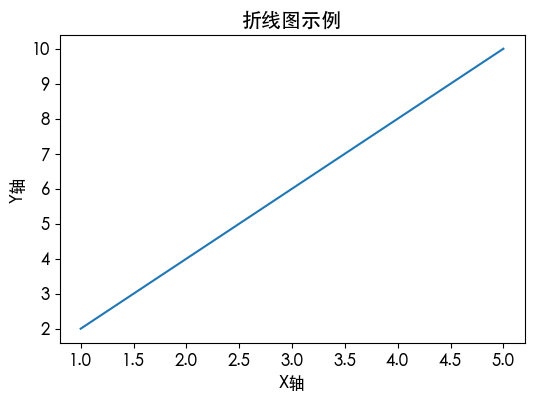

<Figure size 640x480 with 0 Axes>

In [123]:
plt.figure(figsize=(6, 4)) # 画布长为6英寸，高4英寸
%run simple_plot.py

### <center> 正式画图语法 </center>
单独对画布和图的内容进行绘制，这里正式进入绘图代码，重新认识matplotlib

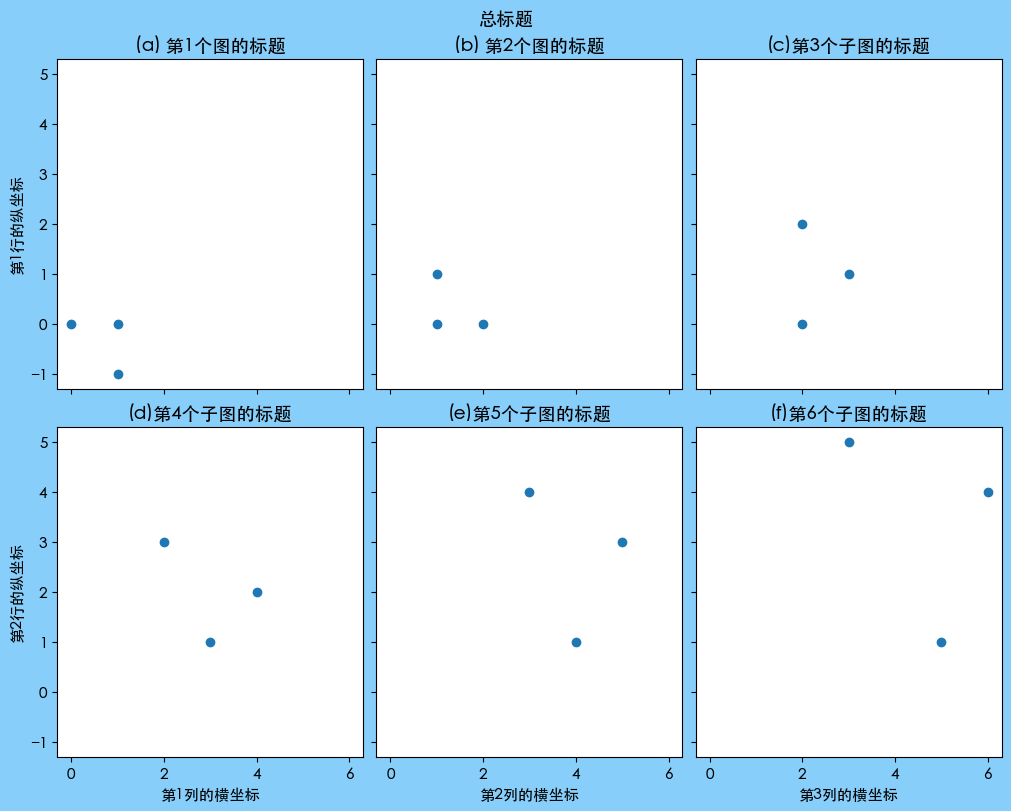

In [124]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'Heiti TC' # windows里面没有这个字体

# fig和axes可以理解为画布和所有子图 内容，nclos=3表示有3列，nrows = 2表示有2行，figsize就是画布大小，facecolor就是画布的颜色，但是一般图片不要设置那么大，不然插入文档字体大小不可控
# sharex表示共用x坐标轴，sharey表示共用y坐标轴
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 8), facecolor='lightskyblue',layout='constrained',sharex=True,sharey=True)
fig.suptitle('总标题') # 整个画布的标题

# 图少的时候，或者每一个子图标题都不一样，那就一个个输入
axes[0,0].set_title('(a) 第1个图的标题') # axes[0,0]表示横轴第一个纵轴第一个子图
axes[0,1].set_title('(b) 第2个图的标题')

# 图多的时候，使用代码遍历画图
aph = ['a','b','c','d','e','f','g','h']
for i, ax in enumerate(axes.flat): # axes.flat表示把axes打扁，原本是3列2行，打扁后变成了6个，这样方便进行一些操作
    ax.scatter([i//2+1, i, i+1],[i,i//3,i-1])
    if i>=2:
        ax.set_title('(%s)'%aph[i]+''+'第%s个子图的标题'%(i+1))

for clo in range(3):
    axes[1][clo].set_xlabel('第%s'%(clo+1)+'列的横坐标')

for row in range(2):
    axes[row][0].set_ylabel('第%s'%(row+1)+'行的纵坐标')
    

### <center> 折线图 </center>
最基本但是最常见的图

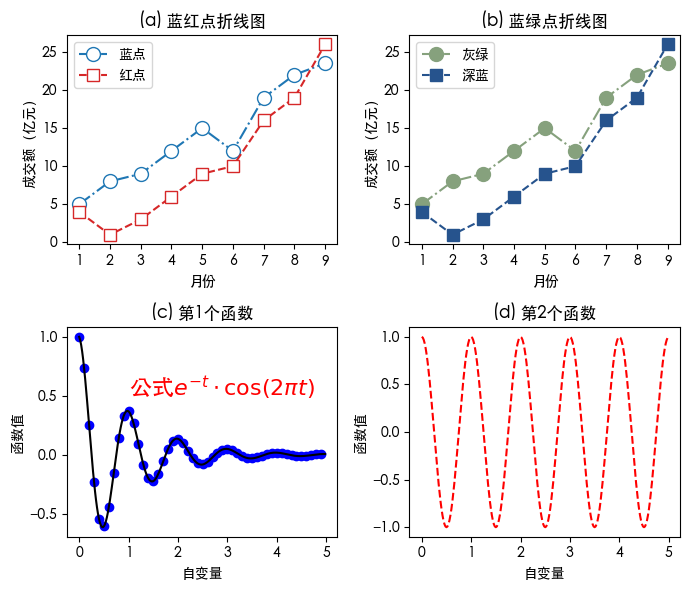

In [125]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Heiti TC' # windows里面没有这个字体
x = [1,2,3,4,5,6,7,8,9]
y1 = [5,8,9,12,15,12,19,22,23.5]
y2 = [4,1,3,6,9,10,16,19,26]
fig, ax = plt.subplots(2,2,figsize=(7,6)) # 两个子图，画布大小7英寸乘3英寸

# python颜色拾取https://xkcd.com/color/rgb/ 可以多看论文的图，选择舒服的配色
ax[0][0].plot(x,y1,color = 'tab:blue',marker = 'o',markersize = 10,markerfacecolor = 'white', linestyle = '-.', label = '蓝点')
ax[0][0].plot(x,y2,color = 'tab:red',marker = 's',markersize = 8, markerfacecolor = 'white',linestyle = '--',label = '红点') # marker表示标点，’s‘是squre方形，其他的翻译就能看懂不做多解释
ax[0][1].plot(x,y1,color = '#86a17d',marker = 'o',markersize = 10, linestyle = '-.', label = '灰绿')
ax[0][1].plot(x,y2,color = '#26538d',marker = 's',markersize = 8,linestyle = '--',label = '深蓝') 

ax[0][0].set_title('(a) 蓝红点折线图') # 标题
ax[0][1].set_title('(b) 蓝绿点折线图') # 标题

# 使用这个ax好处就是，很多子图如果都有类似的内容，可以统一用上面介绍的遍历修改，更高效，比如横坐标纵坐标一样，可以减少代码数量
for i in range(2):
    ax[0][i].set_xlabel('月份') # x轴名称
    ax[0][i].set_ylabel('成交额（亿元）') # y轴名称
    ax[0][i].legend(loc = 'best') # 图例及其位置，上网搜有哪些位置
    ax[0][i].set_xticks([i+1 for i in range(9)])
    
# ----------------------------------------------------------------------------------------------------------------------------
# 绘制函数
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t) 

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

ax[1][0].plot(t1, f(t1), 'bo', t2, f(t2), 'k')
ax[1][1].plot(t2, np.cos(2*np.pi*t2), 'r--')
for i in range(2):
    ax[1][i].set_ylabel('函数值')
    ax[1][i].set_xlabel('自变量')
    
ax[1][0].set_title('(c) 第1个函数')
ax[1][1].set_title('(d) 第2个函数')

ax[1][0].text(1,0.5,r'公式$e^{-t}\cdot \cos(2\pi t)$',fontsize=16,color='red') # 添加文字、latex公式，注意r的位置，一定要注意r的位置
fig.tight_layout() # 这个是让子图自动排版，避免重叠
plt.show()

### <center> 柱状图 </center>
另外一个常见的图

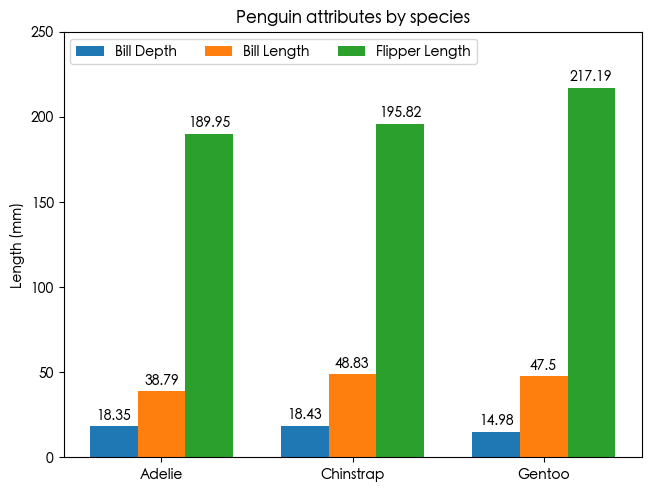

In [126]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species)) # x轴的位置，也就是柱状图那个柱子中线点的x坐标
width = 0.25 # 柱子的宽度
multiplier = 0 # 移动bill depth---->Bill Length----->Flipper Length

fig, ax = plt.subplots(layout='constrained') # layout调整图在画布中的布局


# 如果这个看不懂，可以一类一类的把图给画出来，python画图直接可以叠加
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute) # 将同一类的柱状图画出来，也就是同一个颜色的，第一个事bill depth
    ax.bar_label(rects, padding=3)
    multiplier += 1 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species) # x轴的名称修改
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()
